<a href="https://colab.research.google.com/github/mafaldasalomao/deep_autoencoder_torch_MNIST/blob/main/Deep_Auto_econder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#classify imagens in little features --- similar pca (reduce dims)
#Vaes
from torchvision import datasets, transforms
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
torch.__version__

'1.12.1+cu113'

In [ ]:
torch.manual_seed(42)

In [ ]:
data_set_train = datasets.MNIST(root='MNIST-data', train=True, download=True,
                               transform = transforms.ToTensor())
loader_train = torch.utils.data.DataLoader(data_set_train,
                                           batch_size=256,
                                           shuffle = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST-data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST-data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST-data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST-data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST-data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST-data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw



In [ ]:
data_set_test = datasets.MNIST(root='MNIST-data', train=False, download=True,
                               transform = transforms.ToTensor())
loader_test = torch.utils.data.DataLoader(data_set_test,
                                           batch_size=256,
                                           shuffle = True)

In [10]:
# 784 -> 128 -> 64 -> 32 -> 64 -> 128 -> 784

class autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    #camadas encoder
    self.encoder01 = nn.Linear(in_features = 784, out_features = 128)
    self.encoder02 = nn.Linear(128,  64)
    self.encoder03 = nn.Linear(64, 32)

    #camadas decoder
    self.decoder01 = nn.Linear(32, 64)
    self.decoder02 = nn.Linear(64, 128)
    self.decoder03 = nn.Linear(128, 784)
    
    #camdas de act
    self.activation01 = nn.ReLU()
    self.activation02 = nn.Sigmoid()

  def forward(self, X):
    X = self.activation01(self.encoder01(X))
    X = self.activation01(self.encoder02(X))
    X = self.activation01(self.encoder03(X))

    X = self.activation01(self.decoder01(X))
    X = self.activation01(self.decoder02(X))
    X = self.activation02(self.decoder03(X))

    return X

In [6]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cpu')

In [11]:
model = autoencoder()
model.to(device)

autoencoder(
  (encoder01): Linear(in_features=784, out_features=128, bias=True)
  (encoder02): Linear(in_features=128, out_features=64, bias=True)
  (encoder03): Linear(in_features=64, out_features=32, bias=True)
  (decoder01): Linear(in_features=32, out_features=64, bias=True)
  (decoder02): Linear(in_features=64, out_features=128, bias=True)
  (decoder03): Linear(in_features=128, out_features=784, bias=True)
  (activation01): ReLU()
  (activation02): Sigmoid()
)

In [12]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

In [15]:
#training
for epoch in range(20):
  #TRAIN
  running_loss_train = 0.
  for data in loader_train:
    model.train()
    inputs, _ = data #targets '_' are the images

    inputs = inputs.to(device)
    inputs = inputs.view(-1, 28*28)
    optimizer.zero_grad()
    outputs = model.forward(inputs)
    
    loss = criterion(outputs, inputs.view(*outputs.shape))
    loss.backward()

    optimizer.step()

    running_loss_train += loss.item()

  #VALIDATION
  running_loss_val = 0.
  for data in loader_test: #loader_test is loader_val
    model.eval()
    inputs, _ = data #targets '_' are the images
    inputs = inputs.to(device)
    inputs = inputs.view(-1, 28*28)
    outputs = model.forward(inputs)
    loss = criterion(outputs, inputs.view(*outputs.shape))
    running_loss_val += loss.item()
  # Final da época
  print('ÉPOCA {:3d}: perda_train {:.5f} perda_val {:.5f}'.format(epoch + 1, running_loss_train/len(loader_train), running_loss_val/len(loader_test)))

ÉPOCA   1: perda_train 0.19671 perda_val 0.16530
ÉPOCA   2: perda_train 0.15820 perda_val 0.14918
ÉPOCA   3: perda_train 0.14492 perda_val 0.13880
ÉPOCA   4: perda_train 0.13757 perda_val 0.13347
ÉPOCA   5: perda_train 0.13214 perda_val 0.12936
ÉPOCA   6: perda_train 0.12831 perda_val 0.12520
ÉPOCA   7: perda_train 0.12495 perda_val 0.12293
ÉPOCA   8: perda_train 0.12210 perda_val 0.11903
ÉPOCA   9: perda_train 0.11939 perda_val 0.11705
ÉPOCA  10: perda_train 0.11678 perda_val 0.11413
ÉPOCA  11: perda_train 0.11441 perda_val 0.11250
ÉPOCA  12: perda_train 0.11257 perda_val 0.11062
ÉPOCA  13: perda_train 0.11108 perda_val 0.10951
ÉPOCA  14: perda_train 0.10972 perda_val 0.10843
ÉPOCA  15: perda_train 0.10853 perda_val 0.10681
ÉPOCA  16: perda_train 0.10736 perda_val 0.10548
ÉPOCA  17: perda_train 0.10642 perda_val 0.10528
ÉPOCA  18: perda_train 0.10543 perda_val 0.10363
ÉPOCA  19: perda_train 0.10435 perda_val 0.10315
ÉPOCA  20: perda_train 0.10331 perda_val 0.10166


In [16]:
list(model.children())

[Linear(in_features=784, out_features=128, bias=True),
 Linear(in_features=128, out_features=64, bias=True),
 Linear(in_features=64, out_features=32, bias=True),
 Linear(in_features=32, out_features=64, bias=True),
 Linear(in_features=64, out_features=128, bias=True),
 Linear(in_features=128, out_features=784, bias=True),
 ReLU(),
 Sigmoid()]

In [20]:
class encoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder01 = list(model.children())[0]
    self.encoder02 = list(model.children())[1]
    self.encoder03 = list(model.children())[2]
    self.activation0 = list(model.children())[6]

  def forward(self, X):
    X = self.activation0(self.encoder01(X))
    X = self.activation0(self.encoder02(X))
    X = self.activation0(self.encoder03(X))
    return X

In [21]:
model1 = encoder()
model1.to(device)

encoder(
  (encoder01): Linear(in_features=784, out_features=128, bias=True)
  (encoder02): Linear(in_features=128, out_features=64, bias=True)
  (encoder03): Linear(in_features=64, out_features=32, bias=True)
  (activation0): ReLU()
)

In [23]:
class decoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.decoder01 = list(model.children())[3]
    self.decoder02 = list(model.children())[4]
    self.decoder03 = list(model.children())[5]
    self.activation0 = list(model.children())[6]
    self.activation1 = list(model.children())[7]

  def forward(self, X):
    X = self.activation0(self.decoder01(X))
    X = self.activation0(self.decoder02(X))
    X = self.activation1(self.decoder03(X))
    return X

In [24]:
model2 = decoder()
model2.to(device)

decoder(
  (decoder01): Linear(in_features=32, out_features=64, bias=True)
  (decoder02): Linear(in_features=64, out_features=128, bias=True)
  (decoder03): Linear(in_features=128, out_features=784, bias=True)
  (activation0): ReLU()
  (activation1): Sigmoid()
)

In [25]:
numero_imagens = 10

imagens_teste = next(iter(loader_test))[0][: numero_imagens]
imagens_teste = imagens_teste.to(device)
imagens_teste = imagens_teste.view(-1, 28*28)

In [26]:
imagens_teste.shape

torch.Size([10, 784])

In [31]:
model1.eval()
imagens_codificadas = model1(imagens_teste)

In [32]:
imagens_codificadas.shape

torch.Size([10, 32])

In [34]:
model2.eval()
imagens_decodificadas = model2(imagens_codificadas)

In [35]:
imagens_teste = imagens_teste.detach().cpu().numpy().reshape(-1, 28,28)
imagens_codificadas = imagens_codificadas.detach().cpu().numpy().reshape(-1, 8, 4)
imagens_decodificadas = imagens_decodificadas.detach().cpu().numpy().reshape(-1, 28, 28)

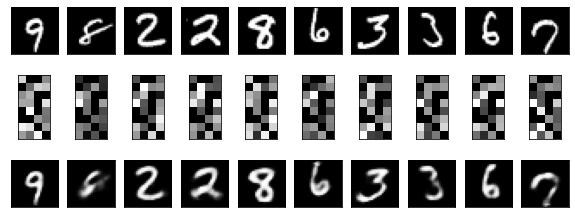

In [38]:
fig, axes = plt.subplots(nrows=3, ncols = numero_imagens, figsize = (10, 4))
for imagens, ax_row in zip([imagens_teste,imagens_codificadas, imagens_decodificadas], axes):
  for img, ax in zip(imagens, ax_row):
    ax.imshow(img, cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)